## Downloding Data from the Internet with Statistical Analysis

## Collecting Data From Yahoo

1.  Go to site https://finance.yahoo.com in your browser.
    
2.  You need to find the ticker symbol(s) for what you want to download. You can search Google directl (e.g. ticker symbol apple) or use the lists in http://eoddata.com/stocklist/NYSE/A.htm (you need to be sure that the stock is on that exchange or else switch exchanges (e.g. Apple is on the NASDAQ). Indices like S&P 500 are not there but you can use google search.

3. We will do this for Google. The name of the company is Alphabet. You can enter it in the search box at the top of the page and you will get a list of symbols used for various Google stocks. Click on GOOG and it takes you to the Google data page. (You could have searched for other things (like Google etc) and got the same result).

4. Near the top is a horizontal list of tabs. Click on Historical Data.

5. Near the top you will find horizontal tabs "Time Period   Historical Prices    Frequency"  . Change the Time period to the one you want and examine the Frequency options (Daily, Weekly, Monthly). You should stick with Daily for our work. 

6. Click the Apply button.

7. Click on Download Data (perhaps below the apply button). The pop-up window offers to save the data as GOOG.csv. You should save it in the directory from which you are running the Jupyter Notebook for simplicity. ".csv" stands for "comma separated variable". Each day's data has several values (e.g. High, Low) and the different headings are separated by commas in the file, with an end of line (and possibly newline) character at the end which is invisible when you examine the data.

8. You can now load the file into the Jupyter Notebook using Pandas and the code in the notebook and proceed to analyse it. The procedure below produces Pandas data frames for stocks. ^GSPC is the ticker symbol for S&P 500, an index of stocks in the New York Stock Exchange. If you use data sources other than Yahoo the ticker symbols may differ.

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd

sp=pd.read_csv('^GSPC2.csv')
ms=pd.read_csv('MSFT.csv')
ap=pd.read_csv('AAPL.csv')

In [2]:
%matplotlib inline

Once read in, you should examine the data. Look at the first few rows using e.g. sp.head() and determine the dimensions of the data frame - sp.describe.

I have deliberately downloaded one stock with a shorter length to indicate possible necessary manipulation before putting the stocks into a data frame.

In [3]:
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-09,1285.449951,1290.780029,1284.819946,1290.150024,1290.150024,2301490000
1,2006-01-10,1290.150024,1290.150024,1283.760010,1289.689941,1289.689941,2373080000
2,2006-01-11,1289.719971,1294.900024,1288.119995,1294.180054,1294.180054,2406130000
3,2006-01-12,1294.180054,1294.180054,1285.040039,1286.060059,1286.060059,2318350000
4,2006-01-13,1286.060059,1288.959961,1282.780029,1287.609985,1287.609985,2206510000


In [4]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-06,26.889999,27.000000,26.490000,26.910000,20.401602,100963000
1,2006-01-09,26.930000,27.070000,26.760000,26.860001,20.363699,55625000
2,2006-01-10,26.650000,27.020000,26.590000,27.000000,20.469837,64921900
3,2006-01-11,27.010000,27.389999,26.900000,27.290001,20.689697,70120700
4,2006-01-12,27.250000,27.260000,26.969999,27.139999,20.575977,45994800


In [5]:
ap.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-06,10.750000,10.957143,10.650000,10.900000,9.771125,176114400
1,2006-01-09,10.961429,11.028571,10.820000,10.864285,9.739107,168760200
2,2006-01-10,10.892858,11.698571,10.832857,11.551429,10.355087,569967300
3,2006-01-11,11.977143,12.114285,11.798572,11.985714,10.744396,373448600
4,2006-01-12,12.138572,12.342857,11.945714,12.041429,10.794340,320202400


In [6]:
print(len(sp['High'].values),len(ms['High'].values),len(ap['High'].values))

3020 3021 3021


We need to drop the first entry of ms and ap.

In [7]:
ms=ms.drop(ms.index[0])
ap=ap.drop(ap.index[0])

In [8]:
print(len(sp['High'].values),len(ms['High'].values),len(ap['High'].values))

3020 3020 3020


In [9]:
dr=sp['Date'].values
len(dr)

3020

Set up a DataFrame with only the Adj Close colums of the 3 stocks

In [10]:
port=pd.DataFrame(sp['Adj Close'].values,columns=['SP'])
port['MSFT']=ms['Adj Close'].values
port['AAPL']=ap['Adj Close'].values

port.head()

,SP,MSFT,AAPL
0,1290.150024,20.363699,9.739107
1,1289.689941,20.469837,10.355087
2,1294.180054,20.689697,10.744396
3,1286.060059,20.575977,10.794340
4,1287.609985,20.613884,10.960820


In [11]:
port.index=dr;port.head()

,SP,MSFT,AAPL
2006-01-09,1290.150024,20.363699,9.739107
2006-01-10,1289.689941,20.469837,10.355087
2006-01-11,1294.180054,20.689697,10.744396
2006-01-12,1286.060059,20.575977,10.794340
2006-01-13,1287.609985,20.613884,10.960820


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f39838d2630>,
      dtype=object)

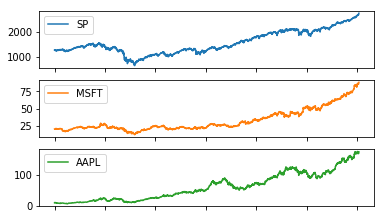

In [12]:
port.plot(subplots=True)

In [13]:
port.loc['2006-01-09',['SP','AAPL']]

SP      1290.150024
AAPL       9.739107
Name: 2006-01-09, dtype: float64

In [14]:
port['SP'].iloc[-1]

2743.149902

In [15]:
port.loc['2006-01-09',['SP','AAPL']]

SP      1290.150024
AAPL       9.739107
Name: 2006-01-09, dtype: float64

## Analysis

,SP,MSFT,AAPL
2006-01-09,NaN,NaN,NaN
2006-01-10,-0.000357,0.005199,0.061328
2006-01-11,0.003475,0.010683,0.036906
2006-01-12,-0.006294,-0.005512,0.004638
2006-01-13,0.001204,0.001841,0.015305


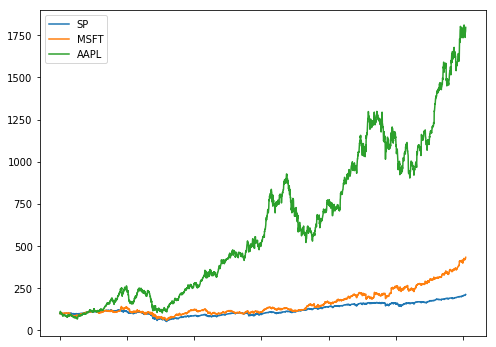

In [34]:
import numpy as np
(port / port.iloc[0] * 100).plot(figsize=(8, 6))   
log_returns = np.log(port / port.shift(1))
log_returns.head()

In [18]:
port=port.dropna(axis=0,how='any')    # how='all' drops only complete rows of NA, how='any' drops all rows containing an NA
port.head()

,SP,MSFT,AAPL
2006-01-09,1290.150024,20.363699,9.739107
2006-01-10,1289.689941,20.469837,10.355087
2006-01-11,1294.180054,20.689697,10.744396
2006-01-12,1286.060059,20.575977,10.794340
2006-01-13,1287.609985,20.613884,10.960820


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f39832f2978>,
      dtype=object)

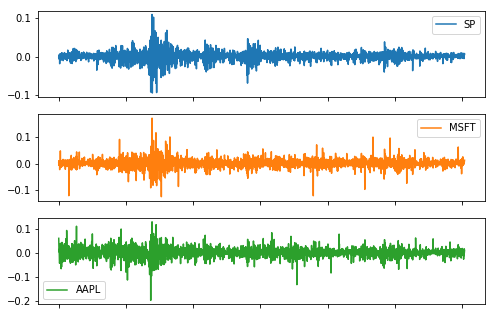

In [23]:
log_returns[['SP','MSFT','AAPL']].plot(subplots=True,figsize=(8, 6))

## Statistical Analysis of Financial Data

Text(0.5,1,'qqplot of S&P500')

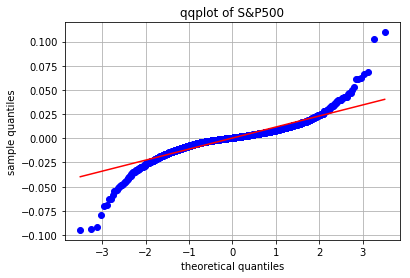

In [24]:
import scipy.stats as scs
scs.probplot(log_returns['SP'].dropna(),plot=plt)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('qqplot of S&P500')

In [35]:
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [36]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])



Results for symbol SP
------------------------------
     statistic           value
------------------------------
          size      3019.00000
           min        -0.09470
           max         0.10957
          mean         0.00025
           std         0.01225
          skew        -0.35561
      kurtosis        11.56904

Results for symbol MSFT
------------------------------
     statistic           value
------------------------------
          size      3019.00000
           min        -0.12458
           max         0.17063
          mean         0.00049
           std         0.01690
          skew         0.07096
      kurtosis        10.70836

Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      3019.00000
           min        -0.19747
           max         0.13019
          mean         0.00096
           std         0.02043
          skew        -0.30029
      kurtosis         6.705

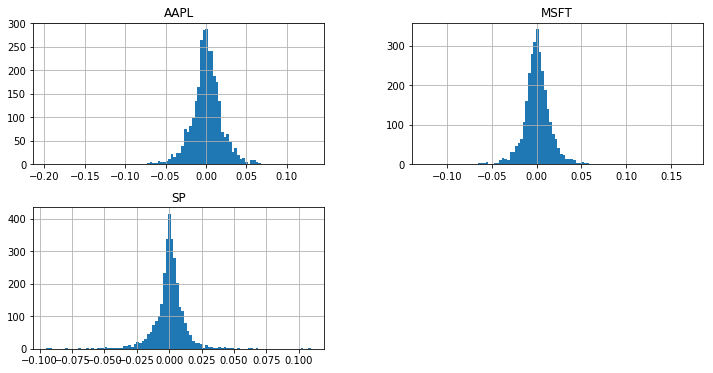

In [37]:
symbols=['SP','MSFT','AAPL']
log_returns.hist(bins=100, figsize=(12, 6))
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SP
--------------------------------
Skew of data set         -0.356
Skew test p-value          0.000
Kurt of data set         11.569
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          0.071
Skew test p-value          0.111
Kurt of data set         10.708
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL
--------------------------------
Skew of data set         -0.300
Skew test p-value          0.000
Kurt of data set          6.706
Kurt test p-value          0.000
Norm test p-value          0.000


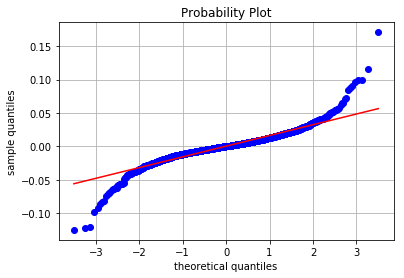

In [28]:
scs.probplot(log_returns['MSFT'].dropna(), plot=plt,fit=True)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SP
--------------------------------
Skew of data set         -0.356
Skew test p-value          0.000
Kurt of data set         11.569
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          0.071
Skew test p-value          0.111
Kurt of data set         10.708
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL
--------------------------------
Skew of data set         -0.300
Skew test p-value          0.000
Kurt of data set          6.706
Kurt test p-value          0.000
Norm test p-value          0.000


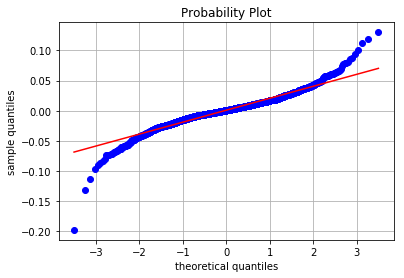

In [29]:
scs.probplot(log_returns['AAPL'].dropna(), plot=plt,fit=True)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)

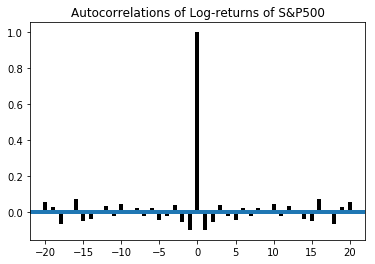

In [30]:
plt.acorr(log_returns['SP'].dropna(), maxlags=20,lw=4)
plt.title('Autocorrelations of Log-returns of S&P500')
plt.show()

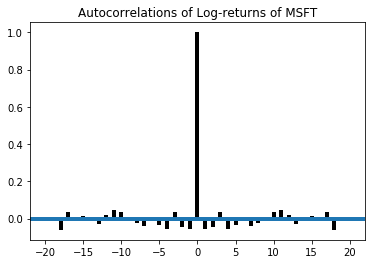

In [31]:
plt.acorr(log_returns['MSFT'].dropna(), maxlags=20,lw=4)
plt.title('Autocorrelations of Log-returns of MSFT')
plt.show()

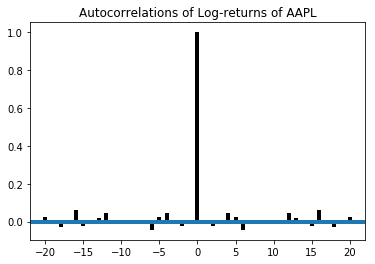

In [32]:
plt.acorr(log_returns['AAPL'].dropna(), maxlags=20,lw=4)
plt.title('Autocorrelations of Log-returns of AAPL')
plt.show()

## Stylised Empirical Facts of Financial Time Series

1. Heavy(Fat) Tails of the distribution of returns. Their statistics indicate finite variance, excess kurtosis. Possible distributions are power law, and Pareto, but they are difficult to fit to the data. Hence extreme (or low probability) events are far more probable than predicted using normal distributions.    
2. Lack of Autocorrelation of Returns.     
3. Gain/Loss Asymmetry. Large drops are more frequent than large rises.  
4. Normality increases with decrease of frequency (increase of spread) of observation.  
5. Volatility Clustering. Large(small) changes tend to be followed by large(small) changes.  
6. Conditional heavy tails. What is left after removing volatility still remains heavy tailed.  
7. Long range dependence on volatility. The autocorrelation function decays slowly.  
8. Leverage effect. Volatility is negatively correlated with returns.  (As one rises, the other falls on average).     
9. Positive Correlation between Number of shares traded and Volatility.  (Both rise and fall together on average).    
